In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('../../data/wifi_data.xlsx')
df.describe()

,OBJECTID,Latitude,Longitude,BoroCode
count,2566.000000,2566.000000,2566.000000,2566.000000
mean,1283.500000,40.738396,-73.947564,2.196804
std,740.884719,0.070845,0.067150,1.282300
min,1.000000,40.509531,-74.244107,1.000000
25%,642.250000,40.693069,-73.985954,1.000000
50%,1283.500000,40.743196,-73.958354,2.000000
75%,1924.750000,40.796066,-73.922968,3.000000
max,2566.000000,40.903723,-73.714838,5.000000


In [3]:
df.head(2)

,OBJECTID,Borough,Type,Provider,Latitude,Longitude,Location_T,City,BoroCode,NTACode
0,998.0,MN,Free,LinkNYC - Citybridge,40.745968,-73.994039,Outdoor Kiosk,New York,1.0,MN17
1,999.0,MN,Free,LinkNYC - Citybridge,40.744614,-73.985069,Outdoor Kiosk,New York,1.0,MN17


## 1
Get the data provided, check frequency distribution of the features, drop irrelevant and
redundant features if any and state your inferences? (10 marks)

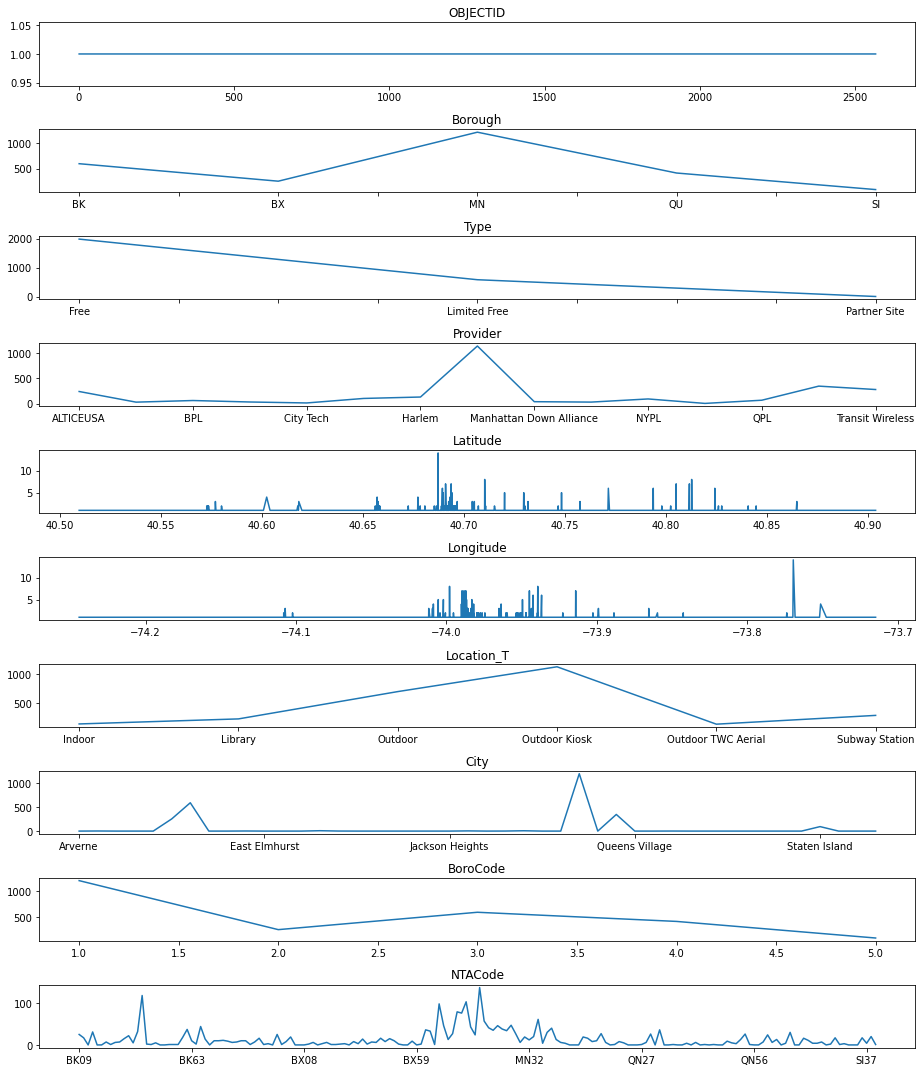

In [4]:
fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(13, 15),
                         sharex=False, sharey=False
                        )
# Plot each axes
for i, ax in enumerate(axes.ravel()):
    feature_name = df.columns[i]
    df[feature_name].value_counts().sort_index().plot(ax=ax)
    ax.set_title(feature_name)
    
plt.tight_layout()
plt.show()

### Conclusion:
Judging by the plot, `OBJECTID` appears to be use less, and seems to be like an index of data. It can identify unique rows, and that seems to be its only use. Hence this feature can be reomved from analysis.

temp =  df['Borough'].value_counts().sort_index()

## 2 Perform univariate and bivariate analysis and answer the following:
    e) 
    f) 

### a
- Which provider has the highest number of wi-fi hotspots? (3 marks)

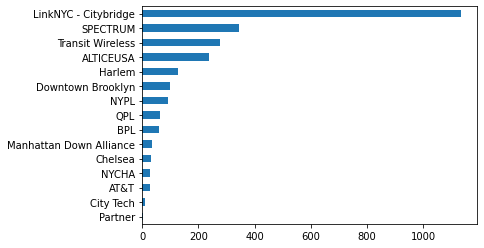

In [6]:
df['Provider'].value_counts().sort_values().plot(kind='barh')
plt.show()

#### Answer
LinkNYC - Citybridge has the highest number of wi-fi hotspots

### b
- Which provider provides the highest number of free wifi hotspots? Is the second highest provider same for “free wifi hotspots” compared to “all wifi hotspots”? (5 marks)

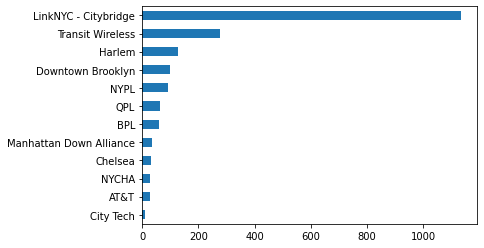

In [7]:
df[df['Type'] == "Free"]['Provider'].value_counts().sort_values().plot(kind='barh')
plt.show()

#### Answer
    - LinkNYC - Citybridge has the highest number of free wi-fi hotspots
    - The second provider with highest free wifi hotspots in Transit Wireless, and it is not same as the overall second most provider of wifi hotspots.

### c
- List down the name of providers that provide “Limited Free” type of wifi? (3 marks)

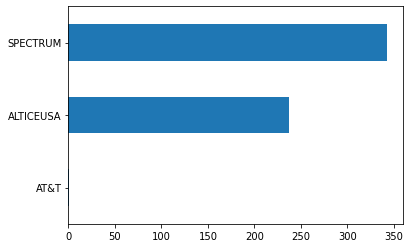

In [8]:
df[df['Type'] == "Limited Free"]['Provider'].value_counts().sort_values().plot(kind='barh')
plt.show()

#### Answer
    - SPECTRUM
    - ALTICEUSA
    - AT&T

### d
- What is the correlation coefficient between borough and BoroCode? (3 marks)

In [9]:
#round(np.corrcoef(df['Borough'], df['BoroCode'])[1][0],2)

#### Answer
Not defined since `Borough` is categorical and `BoroCode` is integer. Hence correlation coefficient is not defined

### e
- Are there any indoor free wifi hotspots? (3 marks)

In [10]:
filter_cond = (df['Type'] == "Free") & (df['Location_T'] == "Indoor")
df[filter_cond]['Provider'].size

0

#### Answer
    - There are no Indoor Free Wifi Hotspots in data

### f
- Which city has the “partner_site” type wifi hotspot? (3 marks)

<AxesSubplot:>

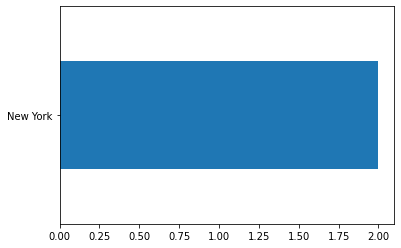

In [11]:
df[df['Type'] == "Partner Site"]['City'].value_counts().sort_values().plot(kind='barh')

#### Answer
Only one city **New York** has Partner Site type wifi hotspot